10 years : gamma = 53.695
4 years : gamma = 53.448


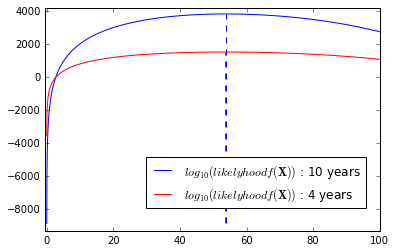

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

def log10pdf(x , y) :
    if x <= 0 :
        return 0
    res = (-1 * x**y) / (math.log(10.0));
    res += (y - 1) * math.log(x,10)
    res += math.log(y,10)
    return res

def log10_likelyhood(sample, y , size) :
    res = 0;
    for i in range(size):
        res += log10pdf(sample[i],y)
    return res

# read sample from file
sample = []
file_name = 'Weibull_Зотов.txt'
with open(file_name) as f:
    for line in f:
        sample += [float(line[:-1])]

four_years = 365*4 + 1
OY = np.logspace(-2,2, num = 4 * (10**3), base = 10.0)

res = [np.zeros(len(OY)) , np.zeros(len(OY))]
argmax = [-np.inf,-np.inf]
maxval = [-np.inf,-np.inf]
minval = np.inf
for i in range(len(OY)) :
    res[0][i] = log10_likelyhood(sample , OY[i] , len(sample))
    res[1][i] = log10_likelyhood(sample , OY[i] , four_years)
    for j in range(2) :
        minval = min(minval , res[j][i])
        if maxval[j] < res[j][i] :
            maxval[j] = res[j][i]
            argmax[j] = OY[i]


print("10 years : gamma = " + str(round(argmax[0],3)))
print("4 years : gamma = " + str(round(argmax[1],3)))

plt.axis([-0.5, 100,
          minval + minval * 0.05,
          max(maxval[0],max(maxval[0],maxval[1]) + max(maxval[0],maxval[1]) * 0.1)])
          
plt.plot([argmax[0],argmax[0]] , [minval , maxval[0]] , "--b")
plt.plot([argmax[1],argmax[1]] , [minval , maxval[1]] , "--r")
plt.plot(OY,res[0],"b", label = r"$log_{10}(likelyhoodf(\mathbf{X}))$ : 10 years")
plt.plot(OY,res[1],"r", label = r"$log_{10}(likelyhoodf(\mathbf{X}))$ : 4 years")
plt.legend(loc=(0.3,0.1))
plt.show()